# Churn Prediction Model


Churn Prediction Model with EDA, Feature Engineering and testing out different models.



## What is churn prediction?


Churn prediction is the process by which a business attempts to predict which customers are at high risk of leaving the company or cancelling a subscription to a service, based on their behaviour with the business' product.



## Why is it important?




1. The cost of acquiring a new customer is almost always greater than the cost to retain an existing customer.

2. This implies that businesses should prioritise retaining its existing customers.

3. Customer churn informs a business if a customer is likely to leave the company.

4. The business can then take further action to retain the customer such as targeted re-engagement campaigns or even re-evaluating company-wide retention initiatives like pricing.

5. Predicting churn allows for the identification of factors that lead to churn.

6. Predicting churn helps in preventing churn





The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022

Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd


## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Telecom churn /telecom_customer_churn.csv")

In [ ]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Overviewing all the columns in the dataset



In [ ]:
df.columns


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df1 = df.copy()



Creating copy of dataset

In [ ]:
df1.head(5)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df1.columns


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

## Exploratory Data Analysis

## Data Preprocessing


Dropping unwanted columns from the dataset


In [ ]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude','Longitude','Churn Category','Churn Reason'],axis=1 , inplace = True)

In [ ]:
df1.shape

(7043, 31)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  6361 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [ ]:
df1.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,150.000000,3564.720000,11979.340000


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.00,32.000,46.00,60.000,80.00
Number of Dependents,7043.0,0.468692,0.962802,0.00,0.000,0.00,0.000,9.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.01,13.050,25.69,37.680,49.99
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.00,13.000,21.00,30.000,85.00
Monthly Charge,7043.0,63.596131,31.204743,-10.00,30.400,70.05,89.750,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Extra Data Charges,7043.0,6.860713,25.104978,0.00,0.000,0.00,0.000,150.00
Total Long Distance Charges,7043.0,749.099262,846.660055,0.00,70.545,401.44,1191.100,3564.72


Checking the number of unique values in each column



In [ ]:
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')


Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Number of Referrals--->12
Tenure in Months--->72
Offer--->6
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3


Getting the percentge of Null Values in each Column



In [ ]:
df1.isnull().sum() / len (df1)


Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Offer                                0.000000
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Internet Type                        0.216669
Avg Monthly GB Download              0.216669
Online Security                      0.216669
Online Backup                        0.216669
Device Protection Plan               0.216669
Premium Tech Support                 0.216669
Streaming TV                         0.216669
Streaming Movies                     0.216669
Streaming Music                      0.216669
Unlimited Data                    

Cleaning Function for the Dataset



In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [ ]:
df1=df1.interpolate()


In [ ]:
df1=df1.dropna()
df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df['Unlimited Data']


0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: Unlimited Data, Length: 7043, dtype: object

In [ ]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']


Checking the unique values of column having datatype: 'object'


In [ ]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')


In [ ]:
unique_values_names(df1)


Gender:['Female' 'Male']
Married:['Yes' 'No']
City:['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Blairsden Graeagle'
 'Lost Hills' 'Windsor']
Offer:['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service:['Yes']
Multiple Lines:['No' 'Yes']
Internet Service:['Yes']
Internet Type:['Cable' 'Fiber Optic' 'DSL']
Online Security:['No' 'Yes']
Online Backup:['Yes' 'No']
Device Protection Plan:['No' 'Yes']
Premium Tech Support:['Yes' 'No']
Streaming TV:['Yes' 'No']
Streaming Movies:['No' 'Yes']
Streaming Music:['No' 'Yes']
Unlimited Data:['Yes' 'No']
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned' 'Joined']


## Data Visualization


In [ ]:
import plotly.express as px


Visualizing Column 'Age' in the dataset



In [ ]:
fig = px.histogram(df1, x = 'Age')
fig.show()

Checking the stats in number_columns of the copied dataset



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

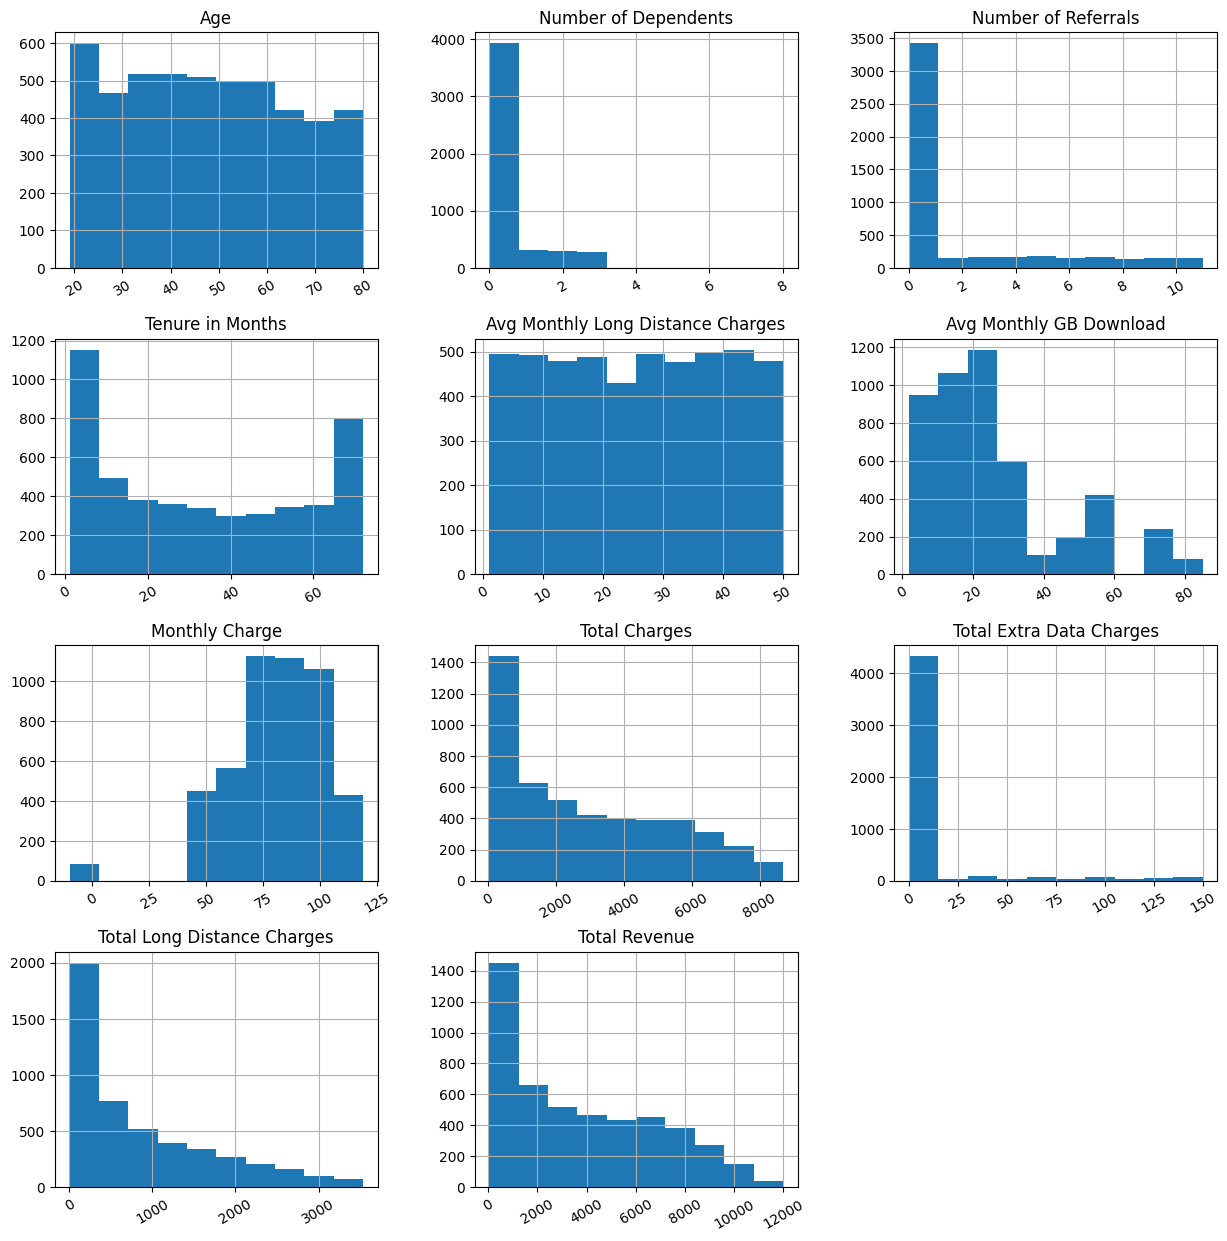

In [ ]:
df1.hist(figsize=(15,15), xrot=30)


In [ ]:
df1['Age']


0       37
1       46
2       50
3       78
4       75
        ..
7036    53
7038    20
7039    40
7040    22
7041    21
Name: Age, Length: 4835, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


Visualizing the number of customers who churned, stayed or joined in the company with a bar plot



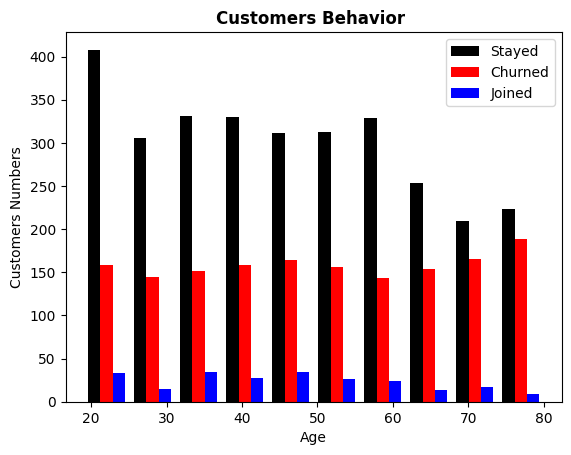

In [ ]:
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()


In [ ]:
import seaborn as sns


Defining Correlation between the columns in the dataset


<ipython-input-31-2c0abe7773ff>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

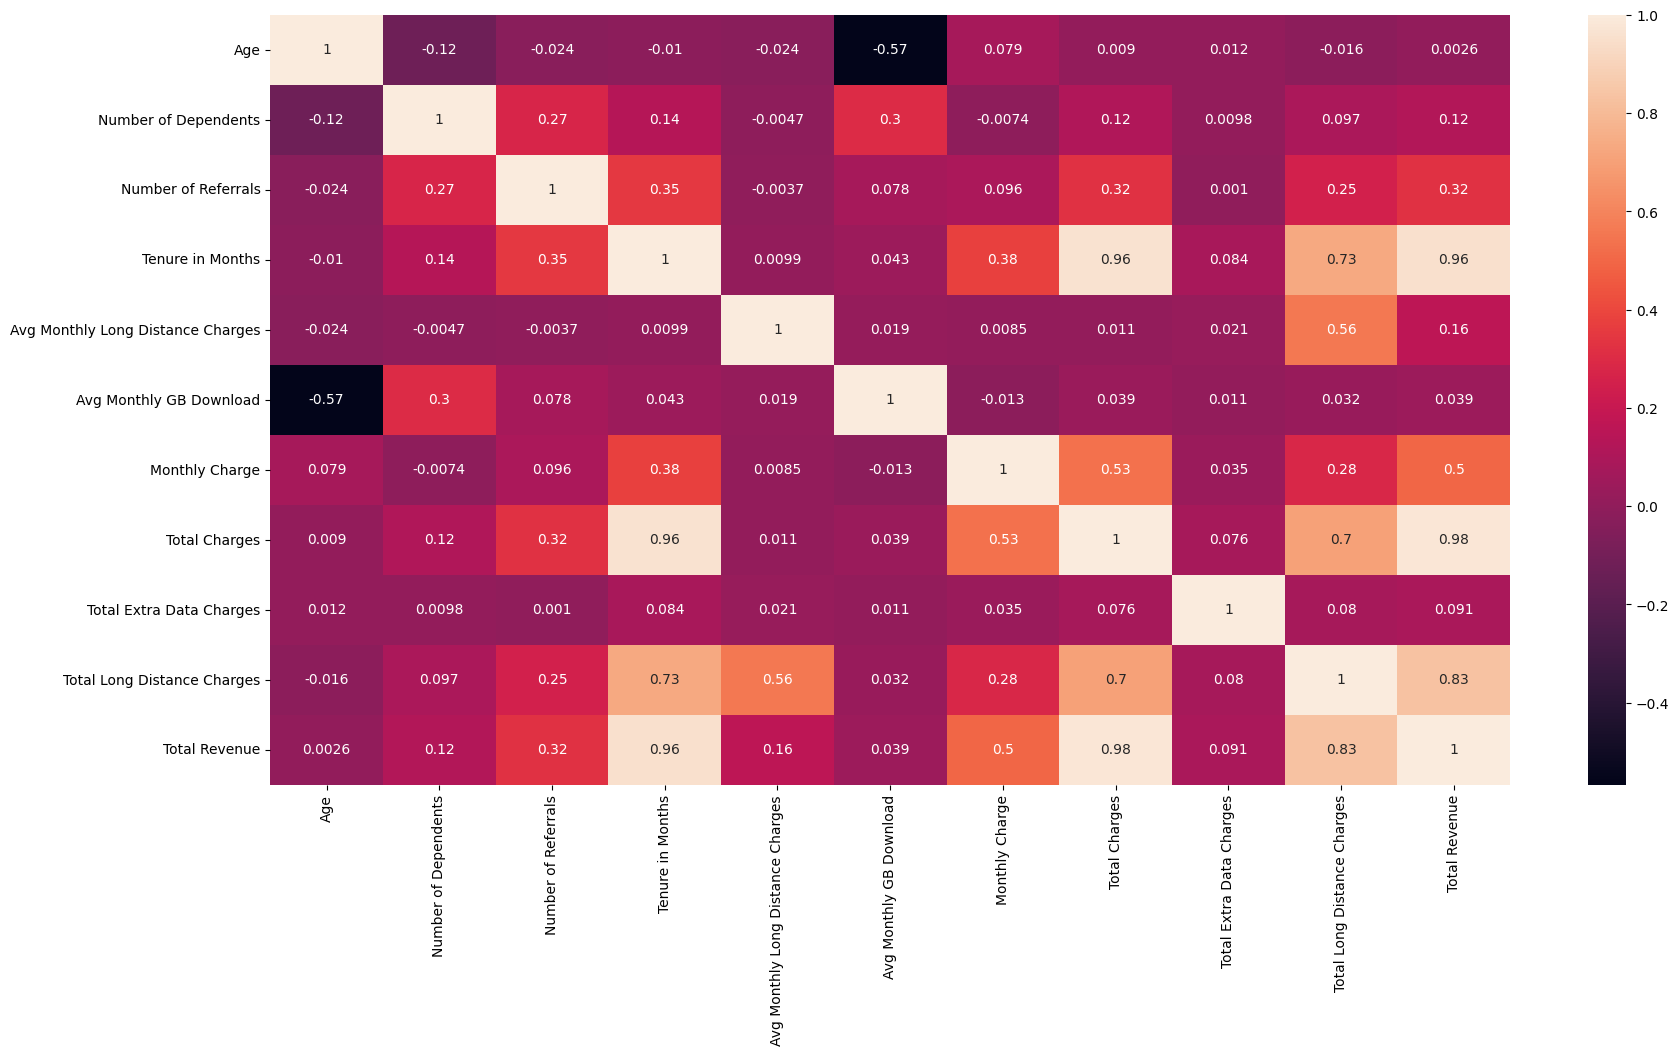

In [ ]:
data=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data, annot=True)

Analyzing Outlier in the dataset with respect to customer status



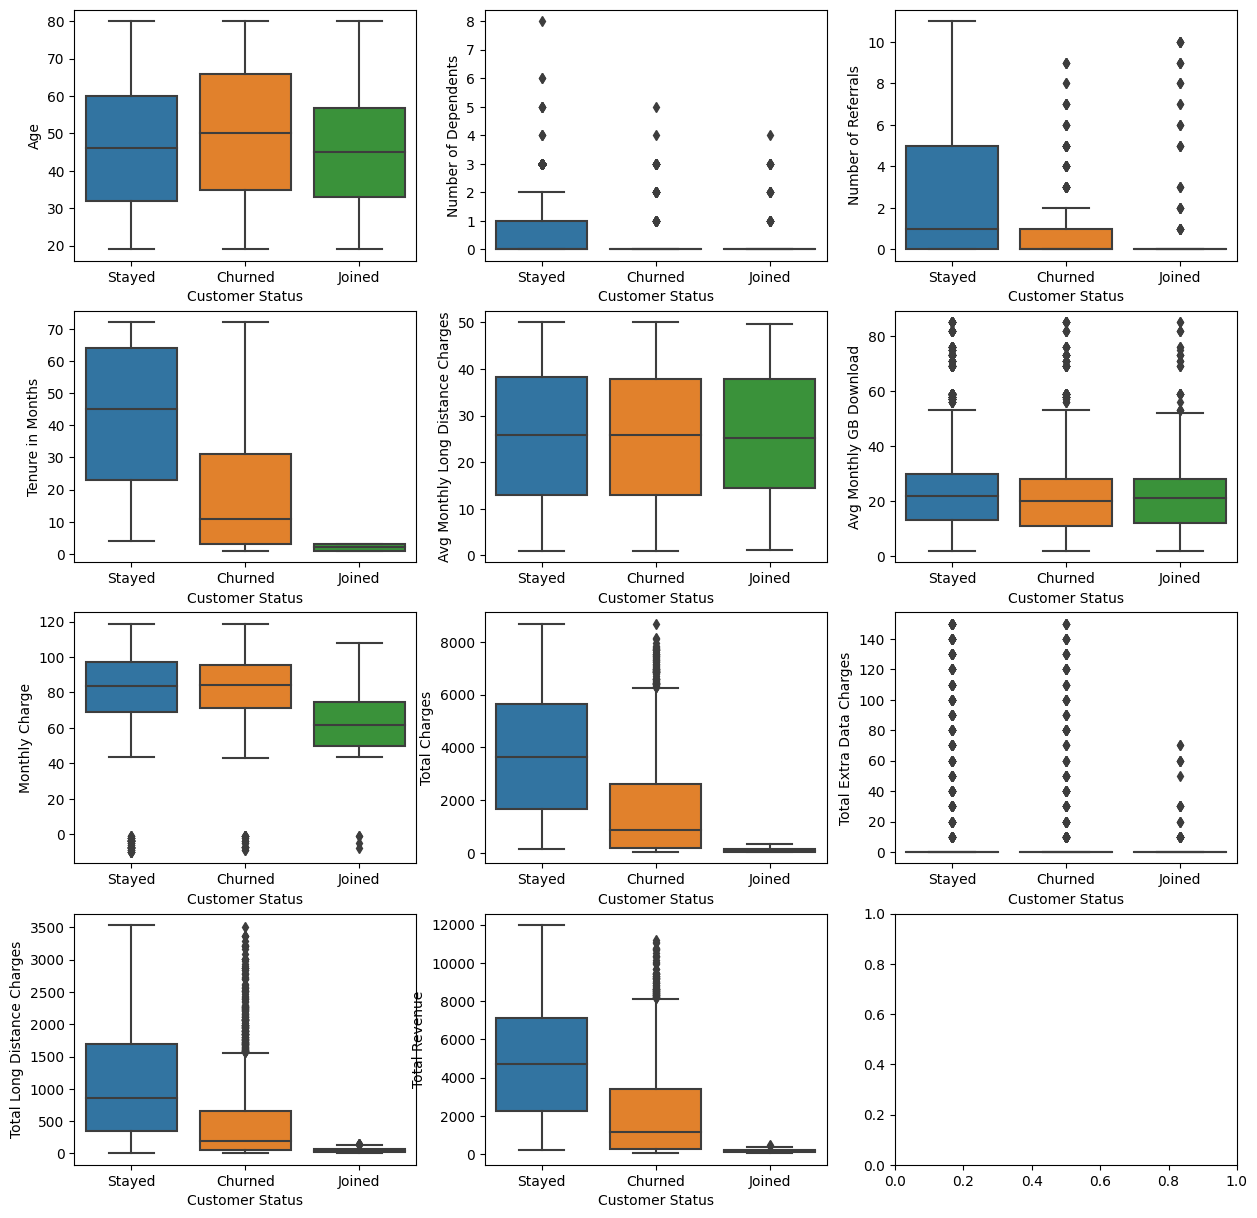

In [ ]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)


In [ ]:
fig = px.density_heatmap(df1, x='Age', y='Total Charges')
fig.show()


<Axes: xlabel='Customer Status'>

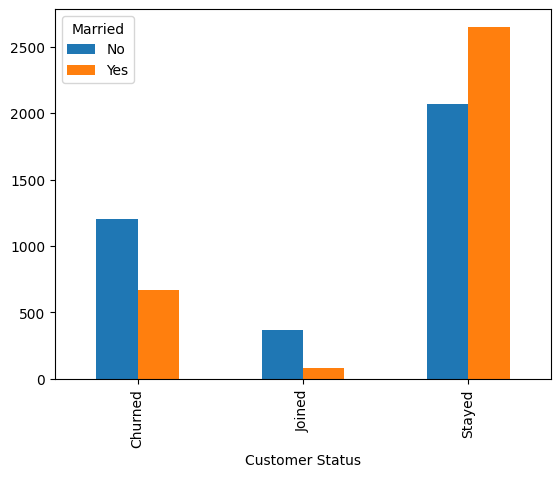

In [ ]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')


<Axes: xlabel='Customer Status'>

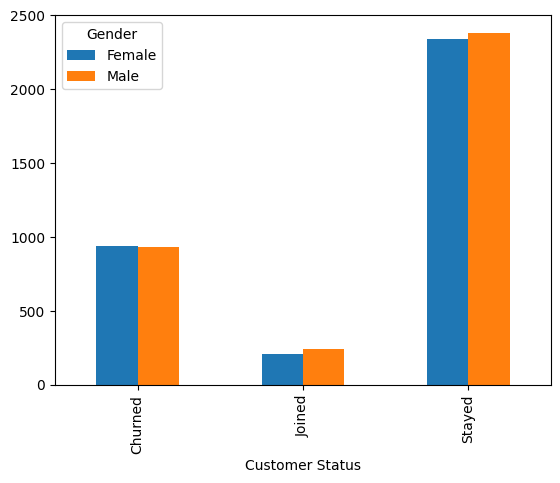

In [ ]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')


In [ ]:
df1['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

Create dictionary with role / data key value pairs



In [ ]:
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]


In [ ]:
Roles.keys()


dict_keys(['Credit Card', 'Bank Withdrawal', 'Mailed Check'])

Selecting the rows where the role is 'Credit Card'



In [ ]:
Roles['Credit Card']


,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Yes,One Year,Yes,Credit Card,65.60,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,No,Month-to-Month,No,Credit Card,-4.00,542.40,10,96.21,610.28,Stayed
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0,22.14,289.54,Churned
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,Los Angeles,0,7,Offer E,Yes,36.49,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0,255.43,888.88,Stayed
7036,Female,53,No,0,Hume,0,1,Offer E,Yes,42.09,...,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0,42.09,112.24,Churned
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7040,Male,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined


In [ ]:
len(Roles)


3

Checking the number of Offers in the dataset



In [ ]:
off = df1['Offer'].value_counts()
off


None       2641
Offer B     585
Offer E     544
Offer D     392
Offer A     382
Offer C     291
Name: Offer, dtype: int64

In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()


In [ ]:
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off


None       842
Offer B    204
Offer A    171
Offer E    126
Offer D    119
Offer C     96
Name: Offer, dtype: int64

In [ ]:
fig = go.Figure([go.Bar(x= df1_off.index, y=df1_off.values)])
fig.show()


In [ ]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})


In [ ]:
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()


dict_keys(['Stayed', 'Churned', 'Joined'])

In [ ]:
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state


None       1601
Offer B     497
Offer A     348
Offer D     250
Offer C     204
Offer E     115
Name: Offer, dtype: int64

## Data Modelling


Replacing the Gender column in the dataset with Label Encoding

0 for Female

1 for Male



In [ ]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)


Replacing the columns with 'yes' and 'no' output by Label Encoding

0 for No

1 for Yes



In [ ]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)


Replacing 'Phone Service' with '1'



In [ ]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)


In [ ]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])


In [ ]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

## Dealing with Imbalance Data


Dropping the Customer_Status

i.e. The column tht we have to predict and set as a dependent variable



In [ ]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']


In [ ]:
X.head(5)


,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,0,0.295082,1,0.0,0.181818,0.112676,1,0.844835,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.442623,0,0.0,0.000000,0.112676,1,0.197632,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.508197,0,0.0,0.000000,0.042254,1,0.666394,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.967213,1,0.0,0.090909,0.169014,1,0.547366,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.918033,1,0.0,0.272727,0.028169,1,0.130053,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head(5)

0    2
1    2
2    0
3    0
4    0
Name: Customer_Status, dtype: int64

## Data Model Building

## Spliting the data in Training and Test Data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)


In [ ]:
len(X_train)


3868

In [ ]:
X_train[:10]


,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
1931,1,0.983607,1,0.000,0.363636,0.718310,1,0.574520,1,1,...,0,0,0,0,0,0,0,0,0,0
1244,1,0.147541,1,0.000,0.090909,0.690141,1,0.676399,1,1,...,0,0,0,0,0,0,0,0,0,0
3167,1,0.475410,1,0.250,0.090909,0.098592,1,0.117803,0,1,...,0,0,0,0,0,0,0,0,0,0
5573,1,0.983607,1,0.000,0.727273,0.169014,1,0.962434,1,1,...,0,0,0,0,0,0,0,0,0,0
2741,0,0.852459,0,0.000,0.000000,0.619718,1,0.238056,1,1,...,0,0,0,0,0,0,0,0,0,0
1184,1,0.377049,1,0.375,0.727273,0.774648,1,0.813597,1,1,...,0,0,0,0,0,0,0,0,0,0
4120,1,0.803279,1,0.000,0.363636,0.859155,1,0.076562,1,1,...,0,0,0,0,0,0,0,0,0,0
373,1,0.114754,0,0.000,0.000000,0.802817,1,0.948550,0,1,...,0,0,0,0,0,0,0,0,0,0
1499,1,0.606557,0,0.000,0.000000,0.084507,1,0.683544,0,1,...,0,0,0,0,0,0,0,0,0,0
6702,0,0.327869,0,0.000,0.000000,0.887324,1,0.553695,1,1,...,0,0,0,0,0,0,0,0,0,0


Importing the required files for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


## Importing Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [ ]:
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]

        }
    },
}


In [ ]:
from sklearn.model_selection import ShuffleSplit

Getting the best_score from the applied models



In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,random_forest,0.784695,{'n_estimators': 10}
1,logistic_regression,0.782834,{'C': 5}
2,naive_bayes_gaussian,0.367735,{}
3,decision_tree,0.774354,{'criterion': 'gini'}
4,XGB_Classifier,0.818821,{'base_score': 0.5}


It was concluded that XGB_Classifier was giving us the best_score in the dataset



## Selecting the model with best score for the dataset


In [ ]:
reg=XGBClassifier()
reg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
reg.score(X_test, y_test)


0.8066184074457083

We got an accuracy of 80.86 percent in the testing dataset



Predicting values from the model build to check the accuracy


In [ ]:
y_predicted = reg.predict(X_test)
y_predicted[:5]


array([2, 2, 0, 2, 2])

Verifying the actual values with the predicted values


In [ ]:
y_test[:5]


3076    2
2931    2
3814    0
5052    2
2128    0
Name: Customer_Status, dtype: int64

Importing Confusion Matrix


Text(95.72222222222221, 0.5, 'Truth')

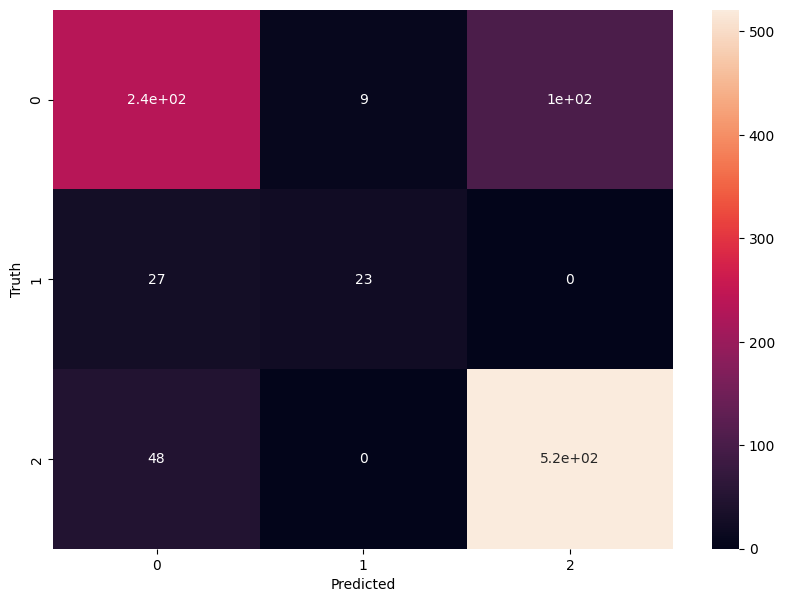

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


## Importing Classification Report


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.76      0.68      0.72       348
           1       0.72      0.46      0.56        50
           2       0.83      0.92      0.87       569

    accuracy                           0.81       967
   macro avg       0.77      0.68      0.72       967
weighted avg       0.80      0.81      0.80       967



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)


0.8066184074457083

## Conclusion

In the end we conclude that the Telecom Customer Churn Prediction was best worked with XGB_Classifier with an accuracy score of 80.86%

### Assessment of the Customer Groups


#### High Value Customers Profile



1. 67.73% are married.
2. They haven't purchased Offer E.
3. More than half of these customers have subscribed to additional internet services (i.e. backup, security, protection plan, tech support) and streaming services (TV, movies, music).
4. Out of the 81.66% who are subsribed to long term contracts, 50.39% opted for the two-year contract, and the remaining 31.27% went for one year



#### Churned Customers Profile



1. Only 35.79% are married.
2. Offer E appears to be the most popular offer around churned customers. Perhaps the company may want to review and look for potential pain points about this offer.
3. More than half of churned customers haven't subscribed to additional internet services and streaming services.
4. 88.55% choose to pay their bills at a monthly basis.


#### What they have in common?



1. Equal distribution in terms of gender.
2. Fiber optic internet service is popular among both customer groups.
3. Majority enjoy unlimited data.
4. Majority prefers to receive paperless billing and pay the bills by bank withdrawal.


##  Propose Recommendations

1. **Concentrate marketing efforts on the highest valuable customers** (top 33% of the customers). This specific group of customers are known for being big spenders and their loyalty to the company. Consider creating an exclusive loyalty program filled with exclusive rewards just for them.

2. The most common cause for churning is due to the **superiority of the competitors' brand offers and services in terms of price and quality.** This underscores the company's attention to review the components of its value proposition and define its competitive advantage over competitors.

3. **Converting current month-to-month users to long term contract subscribers** have been statistically shown to reduce the customer churn rate. Amplify the conversion rate by providing content about the key functional benefits of applying for the subscription model.

4. **Attractively introduce the additional internet and streaming services to internet users**. There is a higher chance that they will retain and become high value customers after purchasing these add-on offers.
5. **Consider reviewing Offer E and identify its pain points which resulted in high churn rates**. Carefully assess across other related marketing offers that performed well and make pertinent changes and improvements out of it.
